# NLP Assignment 1 (40% of grade): Text classification for Fake News Detection

This coursework will involve you implementing functions for a text classifier, which you will train to detect **fake news** in a corpus of approx. 10,000 statements, which will be split into a 80%/20% training/test split. 

In this template you are given the basis for that implementation, though some of the functions are missing, which you have to fill in.

Follow the instructions file **NLP_Assignment_1_Instructions.pdf** for details of each question - the outline of what needs to be achieved for each question is as below.

You must submit all **ipython notebooks and extra resources you need to run the code if you've added them** in the code submission, and a **2 page report (pdf)** in the report submission on QMPlus where you report your methods and findings according to the instructions file for each question.

In [54]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
import csv                               # csv reader
from sklearn.svm import LinearSVC
from nltk.classify import SklearnClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_recall_fscore_support # to report on precision and recall
import numpy as np
import pandas as pd
import nltk

In [56]:
def load_data(path):
    """Load data from a tab-separated file and append it to raw_data."""
    with open(path) as f:
        reader = csv.reader(f, delimiter='\t')
        for line in reader:
            if line[0] == "Id":  # skip header
                continue
            (label, text) = parse_data_line(line)
            raw_data.append((text, label))

def split_and_preprocess_data(percentage):
    """Split the data between train_data and test_data according to the percentage
    and performs the preprocessing."""
    num_samples = len(raw_data)
    num_training_samples = int((percentage * num_samples))
    for (text, label) in raw_data[:num_training_samples]:
        train_data.append((to_feature_vector(pre_process(text)),label))
    for (text, label) in raw_data[num_training_samples:]:
        test_data.append((to_feature_vector(pre_process(text)),label))

# Question 1: Input and Basic preprocessing (10 marks)

In [57]:
def convert_label(label):
    """Converts the multiple classes into two,
    making it a binary distinction between fake news and real."""
    #return label
    # Converting the multiclass labels to binary label
    
    labels_map = {
        'true': 'REAL',
        'mostly-true': 'REAL',
        'half-true': 'REAL',
        'false': 'FAKE',
        'barely-true': 'FAKE',
        'pants-fire': 'FAKE'
    }
    return labels_map[label]

def parse_data_line(data_line):
    # Should return a tuple of the label as just FAKE or REAL and the statement
    # resolving the data set into its components
    label=convert_label(data_line[1])
    # e.g. (label, statement)
    text=data_line[2]
    return (label, text)

In [58]:
import re
# Input: a string of one statement
def pre_process(text):
  text=re.sub(r"(\w)([.,;:!?'\"”\)])",r"\1\2",text)
  text=re.sub(r"([.,;:!?'\"”\(\)])(\w)",r"\1\2",text)
  text=re.split(r"\s+",text)
  tokens=[t.lower() for t in text]
    # Should return a list of tokens
    # DESCRIBE YOUR METHOD IN WORDS
  return tokens


we have used normal split wise method to tokenise the raw data. and also cleaned the raw data. We can also use tokenisation method directly.

# Question 2: Basic Feature Extraction (20 marks)

In [59]:
#reference from Lab code nb1 #reference Geeks for Geeks
global_feature_dict = {} # A global dictionary of features
a=len(global_feature_dict)

def to_feature_vector(tokens,training=False):
  
  featureVector = {}  
  for t in tokens:
      if t in featureVector:
        featureVector[t]+=1
      else:
        featureVector[t]=1
  for t in tokens:
      if t in global_feature_dict:
        global_feature_dict[t]=+1
      else:
        global_feature_dict[t]=1
    # Should return a dictionary containing features as keys, and weights as values
    # DESCRIBE YOUR METHOD IN WORDS
  return featureVector




In [73]:
# TRAINING AND VALIDATING OUR CLASSIFIER

def train_classifier(data):
    print("Training Classifier...")
    pipeline =  Pipeline([('svc', LinearSVC())])
    return SklearnClassifier(pipeline).train(data)

# Question 3: Cross-validation (20 marks)

In [74]:
#solution
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score


def cross_validate(dataset, folds):
    results = []
    a,b,c,d,e=0,0,0,0,0
    
    fold_size = int(len(dataset)/folds) + 1
#splitting the data into train data and test data and
    for i in range(0,len(dataset),int(fold_size)):
      tn_data=dataset[:i]+dataset[i+fold_size:]
      ts_data=dataset[i:i+fold_size]
      dataframe=pd.DataFrame(ts_data,columns=['text',"labels"])
      tst_texts=dataframe['text']
      classifier=train_classifier(tn_data)
      tst_labels=dataframe["labels"]
      predictions=predict_labels(tst_texts, classifier)
      precision,recall,fscore,e=precision_recall_fscore_support(tst_labels,predictions)
      a=a+precision
      b=b+recall
      c=c+fscore
      a=a/10;b=b/10;c=c/10;
      results=[a,b,c]
      cv_results=pd.DataFrame(results)

    return results

In [75]:
# PREDICTING LABELS GIVEN A CLASSIFIER

def predict_labels(samples, classifier):
    """Assuming preprocessed samples, return their predicted labels from the classifier model."""
    return classifier.classify_many(samples)

def predict_label_from_raw(sample, classifier):
    """Assuming raw text, return its predicted label from the classifier model."""
    return classifier.classify(to_feature_vector(preProcess(reviewSample)))

In [76]:
# MAIN

# loading reviews
# initialize global lists that will be appended to by the methods below
raw_data = []          # the filtered data from the dataset file
train_data = []        # the pre-processed training data as a percentage of the total dataset
test_data = []         # the pre-processed test data as a percentage of the total dataset


# references to the data files
data_file_path = 'fake_news.tsv'

# Do the actual stuff (i.e. call the functions we've made)
# We parse the dataset and put it in a raw data list
print("Now %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Preparing the dataset...",sep='\n')

load_data(data_file_path) 

# We split the raw dataset into a set of training data and a set of test data (80/20)
# You do the cross validation on the 80% (training data)
# We print the number of training samples and the number of features before the split
print("Now %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Preparing training and test data...",sep='\n')

split_and_preprocess_data(0.8)

# We print the number of training samples and the number of features after the split
print("After split, %d rawData, %d trainData, %d testData" % (len(raw_data), len(train_data), len(test_data)),
      "Training Samples: ", len(train_data), "Features: ", len(global_feature_dict), sep='\n')


Now 0 rawData, 0 trainData, 0 testData
Preparing the dataset...
Now 4462 rawData, 0 trainData, 0 testData
Preparing training and test data...
After split, 4462 rawData, 3569 trainData, 893 testData
Training Samples: 
3569
Features: 
12394


In [ ]:
train_data

In [78]:
cross_validate(train_data, 10)  # will work and output overall performance of p, r, f-score when cv implemented

Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...


[array([0.05400666, 0.06672786]),
 array([0.04946409, 0.07098822]),
 array([0.05160912, 0.06877437])]

# 4. Error Analysis (10 marks)

In [79]:
from sklearn import metrics
import matplotlib.pyplot as plt
# a function to make the confusion matrix readable and pretty
def confusion_matrix_heatmap(y_test, preds, labels):
    """Function to plot a confusion matrix"""
    # pass labels to the confusion matrix function to ensure right order
    cm = metrics.confusion_matrix(y_test, preds)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels( labels, rotation=45)
    ax.set_yticklabels( labels)

    for i in range(len(cm)):
        for j in range(len(cm)):
            text = ax.text(j, i, cm[i, j],
                           ha="center", va="center", color="w")

    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    # fix for mpl bug that cuts off top/bottom of seaborn viz:
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show() # ta-da!
    plt.show()

Training Classifier...


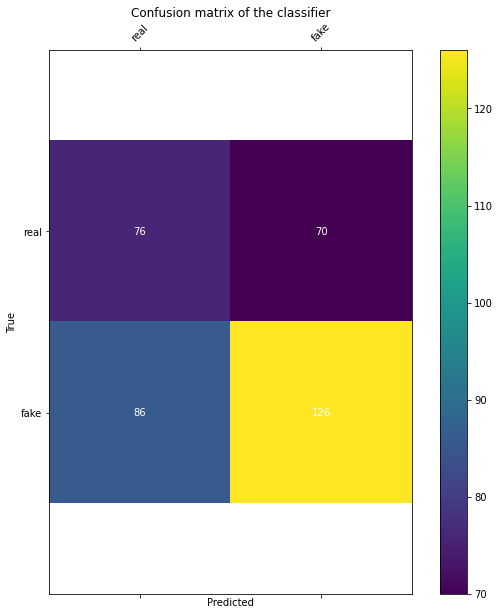

In [80]:
from sklearn.metrics import confusion_matrix
fz=round(len(train_data)/10)+1
target=["real","fake"]
t_data=[]
t_predection=[]
test=train_data[:fz]
for data in test:
  t_data.append(data[0])
  t_predection.append(data[1])
train=train_data[fz:]
classifier=train_classifier(train)
pred=predict_labels(t_data,classifier)
confusion_matrix_heatmap(t_predection,pred,target)


# Questions 5 (20%) and 6 (20%) (recommend starting a new notebook)

In [81]:
# Finally, check the accuracy of your classifier by training on all the traning data
# and testing on the test set
# Will only work once all functions are complete
functions_complete = True  # set to True once you're happy with your methods for cross val
if functions_complete:
    print(test_data[0])   # have a look at the first test data instance
    classifier = train_classifier(train_data)  # train the classifier
    test_true = [t[1] for t in test_data]   # get the ground-truth labels from the data
    test_pred = predict_labels([x[0] for x in test_data], classifier)  # classify the test data to get predicted labels
    final_scores = precision_recall_fscore_support(test_true, test_pred, average='weighted') # evaluate
    print("Done training!")
    print("Precision: %f\nRecall: %f\nF Score:%f" % final_scores[:3])

({'just': 1, 'like': 1, 'hillary': 1, 'clinton,': 1, 'russ': 1, 'feingold': 2, 'had': 1, 'a': 2, 'run-in': 1, 'with': 1, 'corruption': 1, 'and': 1, 'scandal': 1, 'by': 1, 'using': 1, 'personal': 1, 'slush': 1, 'fund': 1, '--': 2, 'a.k.a.': 1, 'the': 1, 'foundation': 1, 'while': 1, 'plotting': 1, 'another': 1, 'run': 1, 'for': 1, 'u.s.': 1, 'senate.': 1}, 'FAKE')
Training Classifier...
Done training!
Precision: 0.575900
Recall: 0.568869
F Score:0.571079
